# Lisbon House Price Prediction Project


## 1 - Scope the Project

Everyone, at some point in their lives, needs to look for a house to buy.

However, there’s often a property priced unfairly that many people may not notice.

To address these challenges, this project develops a Machine Learning model trained 
on the Lisbon House Prices Dataset, created by Carlos José on Kaggle.


# 2 - Gather Data

Data Set from Kaggle: 
https://www.kaggle.com/datasets/cgrodrigues/lisbon-house-prices


In [ ]:
# Imports needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


house_price_data = pd.read_csv("lisbon-houses.csv")
house_price_data.head()




,Id,Condition,PropertyType,PropertySubType,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Country,District,Municipality,Parish,Price M2,Price
0,101,Used,Homes,Apartment,3,1,76,152,0,38.7792,-9.1186,Portugal,Lisboa,Lisboa,Olivais,2463,198000
1,102,Used,Homes,Duplex,5,3,190,380,0,38.7056,-9.1784,Portugal,Lisboa,Lisboa,Alcantara,3125,1270000
2,103,Used,Homes,Apartment,1,1,26,52,0,38.7058,-9.1639,Portugal,Lisboa,Lisboa,Estrela,4005,140000
3,104,Used,Homes,Apartment,5,4,185,370,0,38.7466,-9.1640,Portugal,Lisboa,Lisboa,Sao Domingos de Benfica,3412,995000
4,105,Used,Homes,Apartment,7,1,150,300,0,38.7323,-9.1287,Portugal,Lisboa,Lisboa,Arroios,3277,570000


##

## 3 - Data Clean and Exploration


In [299]:
house_price_data.dtypes


Id                   int64
Condition           object
PropertyType        object
PropertySubType     object
Bedrooms             int64
Bathrooms            int64
AreaNet              int64
AreaGross            int64
Parking              int64
Latitude           float64
Longitude          float64
Country             object
District            object
Municipality        object
Parish              object
Price M2             int64
Price                int64
dtype: object

In [300]:
# Verify if there is any null value
house_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               246 non-null    int64  
 1   Condition        246 non-null    object 
 2   PropertyType     246 non-null    object 
 3   PropertySubType  246 non-null    object 
 4   Bedrooms         246 non-null    int64  
 5   Bathrooms        246 non-null    int64  
 6   AreaNet          246 non-null    int64  
 7   AreaGross        246 non-null    int64  
 8   Parking          246 non-null    int64  
 9   Latitude         246 non-null    float64
 10  Longitude        246 non-null    float64
 11  Country          246 non-null    object 
 12  District         246 non-null    object 
 13  Municipality     246 non-null    object 
 14  Parish           246 non-null    object 
 15  Price M2         246 non-null    int64  
 16  Price            246 non-null    int64  
dtypes: float64(2), i

In [301]:
# Remove some variables that are not the most important

house_price_data = house_price_data.drop(["Id", "Condition", "PropertyType",
                 "PropertySubType", "AreaNet", "Parking", "Parish",
                 "Country", "District", "Municipality"], axis="columns")
house_price_data
            


,Bedrooms,Bathrooms,AreaGross,Latitude,Longitude,Price M2,Price
0,3,1,152,38.7792,-9.1186,2463,198000
1,5,3,380,38.7056,-9.1784,3125,1270000
2,1,1,52,38.7058,-9.1639,4005,140000
3,5,4,370,38.7466,-9.1640,3412,995000
4,7,1,300,38.7323,-9.1287,3277,570000
...,...,...,...,...,...,...,...
241,2,1,132,38.7460,-9.1769,2727,196500
242,3,1,150,38.7177,-9.1341,4807,245000
243,2,1,180,38.7694,-9.1138,2463,486000
244,4,3,242,38.7030,-9.2044,3542,375000


array([[<Axes: title={'center': 'Bedrooms'}>,
        <Axes: title={'center': 'Bathrooms'}>,
        <Axes: title={'center': 'AreaGross'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Price M2'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >, <Axes: >]],
      dtype=object)

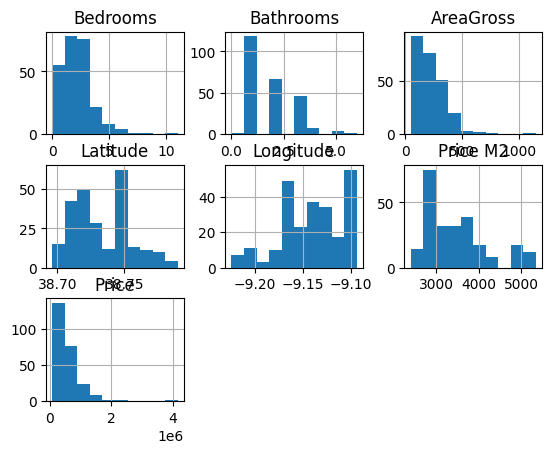

In [302]:
house_price_data.hist()

<Axes: >

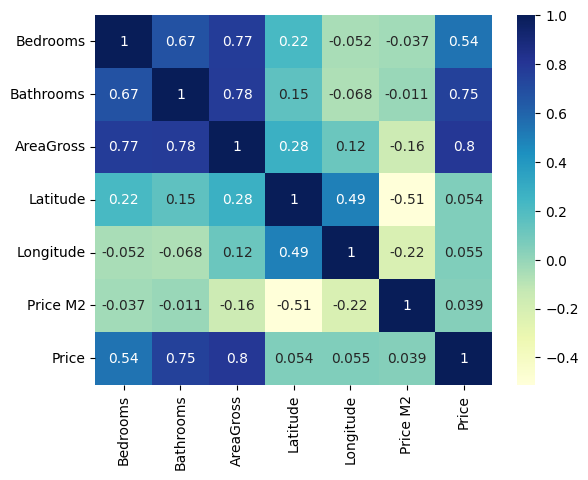

In [303]:
# Bathrooms and AreaGross are the most correlated variables
sns.heatmap(house_price_data.corr(), annot=True, cmap="YlGnBu")

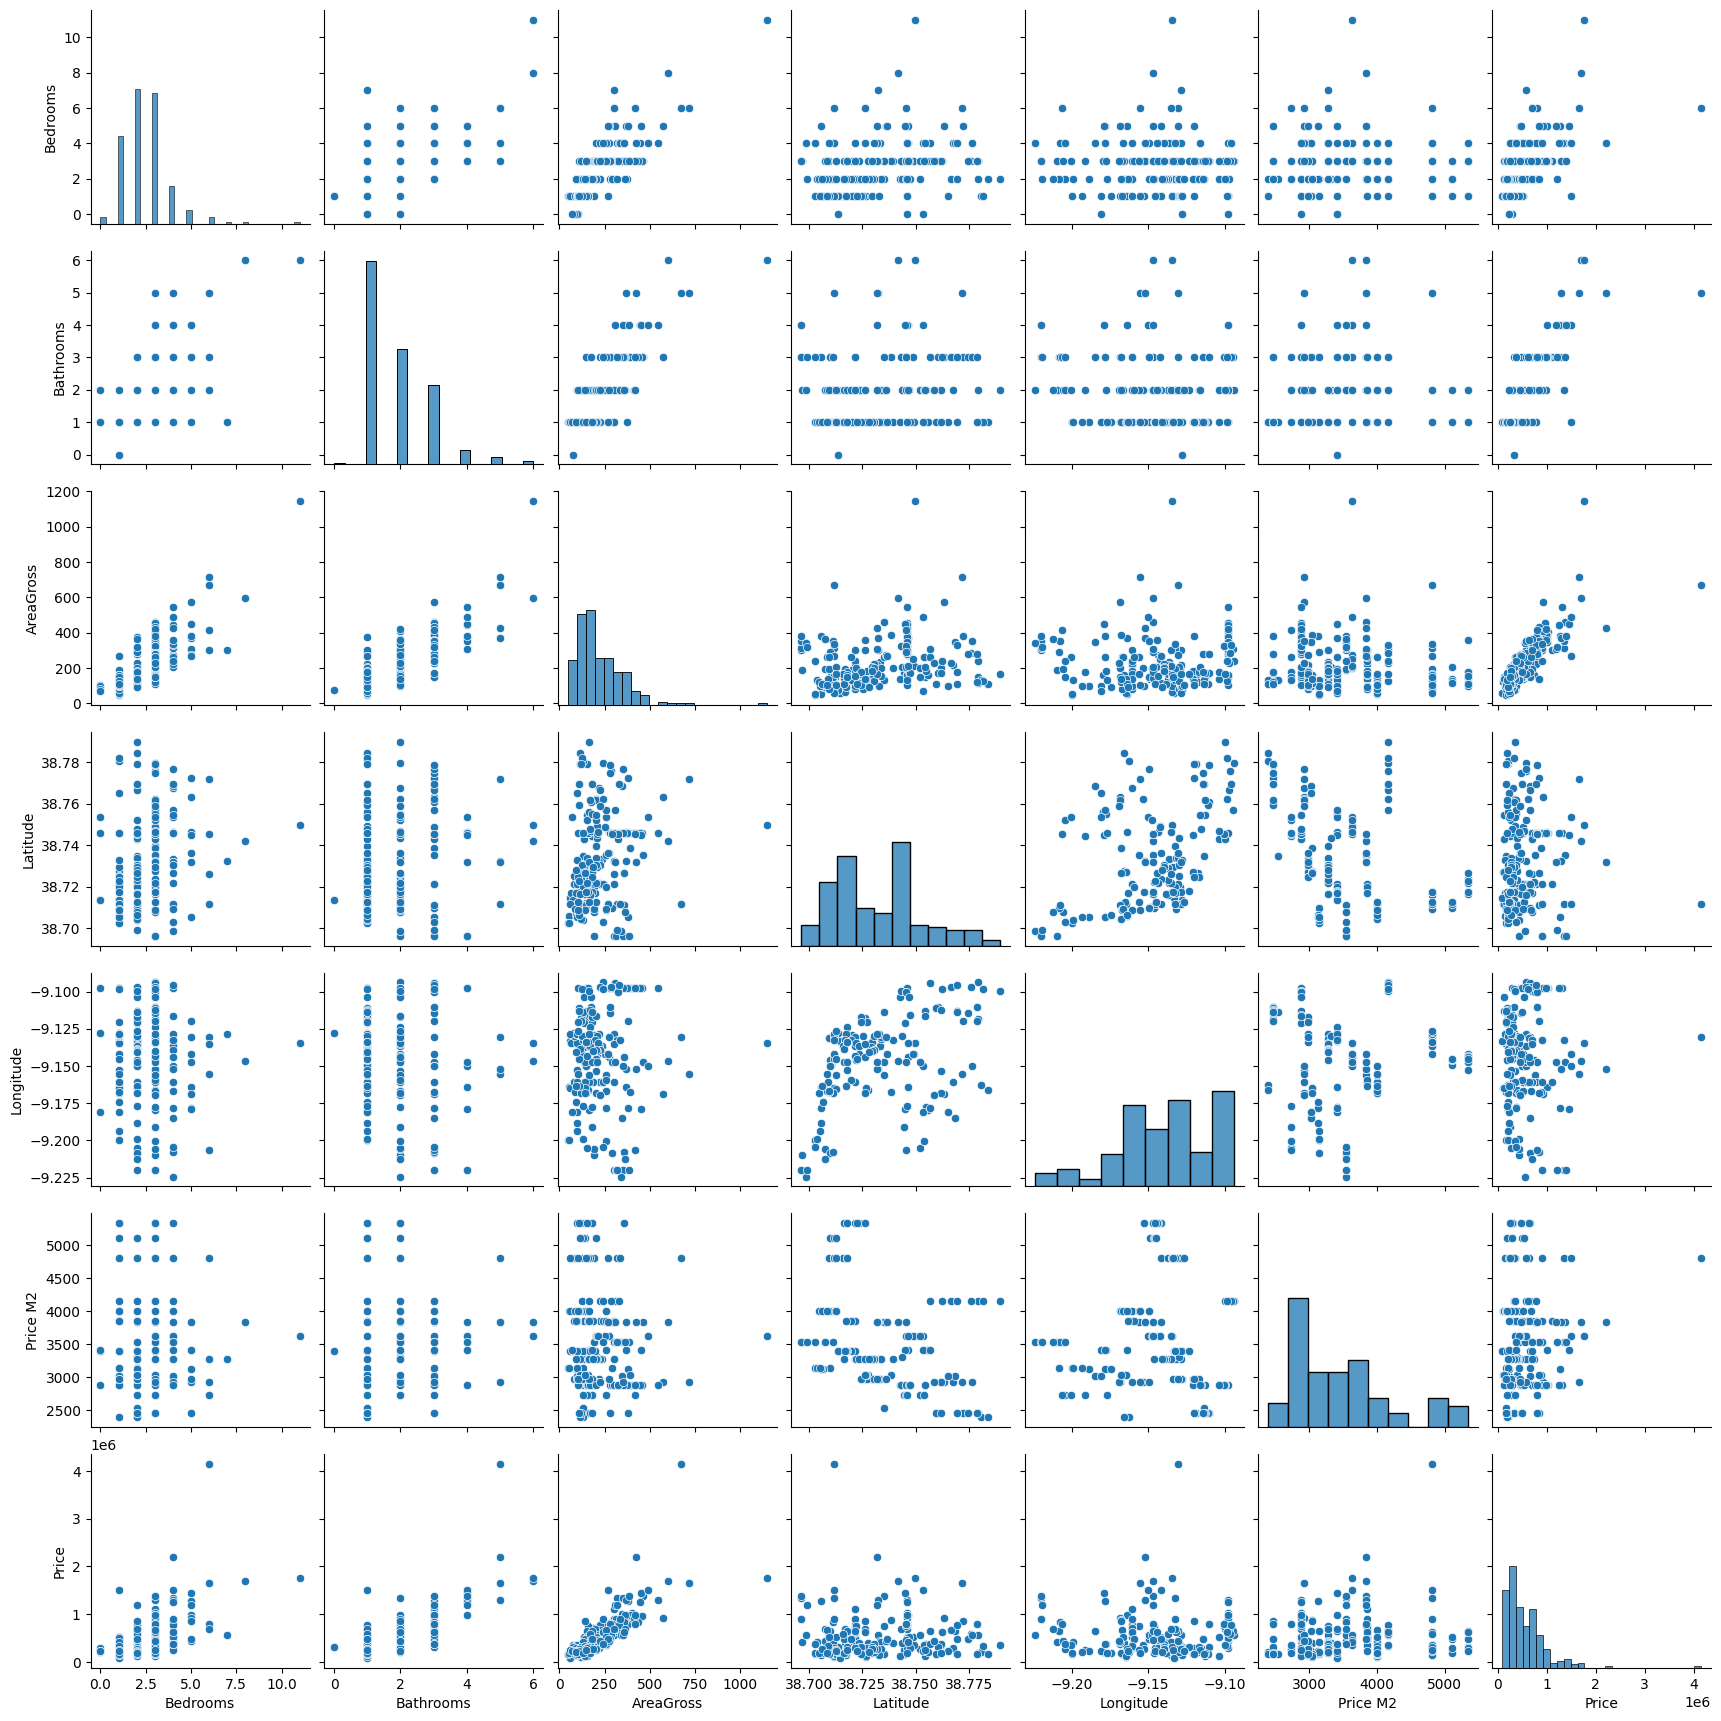

In [304]:
# Area Gross have the best correlation
sns.pairplot(house_price_data)

In [305]:
# Area Gross is one of the best indicators of the price
house_price_data.corr()

,Bedrooms,Bathrooms,AreaGross,Latitude,Longitude,Price M2,Price
Bedrooms,1.000000,0.672071,0.771292,0.224300,-0.052104,-0.037470,0.541830
Bathrooms,0.672071,1.000000,0.781154,0.154104,-0.068226,-0.011177,0.746716
AreaGross,0.771292,0.781154,1.000000,0.277058,0.117813,-0.161325,0.798370
Latitude,0.224300,0.154104,0.277058,1.000000,0.492685,-0.511346,0.054091
Longitude,-0.052104,-0.068226,0.117813,0.492685,1.000000,-0.217179,0.055152
Price M2,-0.037470,-0.011177,-0.161325,-0.511346,-0.217179,1.000000,0.039089
Price,0.541830,0.746716,0.798370,0.054091,0.055152,0.039089,1.000000


##

## Model Building

In [306]:
house_price_data

,Bedrooms,Bathrooms,AreaGross,Latitude,Longitude,Price M2,Price
0,3,1,152,38.7792,-9.1186,2463,198000
1,5,3,380,38.7056,-9.1784,3125,1270000
2,1,1,52,38.7058,-9.1639,4005,140000
3,5,4,370,38.7466,-9.1640,3412,995000
4,7,1,300,38.7323,-9.1287,3277,570000
...,...,...,...,...,...,...,...
241,2,1,132,38.7460,-9.1769,2727,196500
242,3,1,150,38.7177,-9.1341,4807,245000
243,2,1,180,38.7694,-9.1138,2463,486000
244,4,3,242,38.7030,-9.2044,3542,375000


In [ ]:
from sklearn.model_selection import train_test_split

# Inputing the price as the variable we want to predict
x = house_price_data.drop(["Price"], axis=1)
y = house_price_data["Price"]

# Using 20% of the data only for testing the model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
# Training 
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)


LinearRegression()

In [ ]:
# The Score of this model is 70% which is not bad for a linear model
reg.score(x_test, y_test)

0.7029485168222889